In [5]:
import numpy as np
import sys
import scipy.io as sio  # For reading the matlab .mat format
import pickle as pk
import numpy as np
import pandas as pd
import iisignature as iis
import gudhi
from gtda.homology import VietorisRipsPersistence
from gtda.homology import FlagserPersistence
import matplotlib.pyplot as plt
import random
from gtda.diagrams import PersistenceEntropy
from gtda.diagrams import Amplitude
from gudhi.representations.vector_methods import Entropy
from gtda.diagrams import PairwiseDistance
from gtda.plotting import plot_diagram
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
%run FUNCTIONS.ipynb

In [417]:
# PATH SIGNATURE
Sig=list()
labels=[]
for i in range(1,56):
    if not(i==17):
        time_series=load_data_mat(f"BP_Timeseries/sub{i}_EPI_BPaal_timeseries.mat")
        s=iis.prepare(116,2)
        feat=iis.logsig(time_series,s)
        Sig.append(feat)
        labels.append("BP")
        
for i in range(1,66):
    if not(i==33):
        time_series=load_data_mat(f"HC_Timeseries/sub{i}_EPI_HCaal_timeseries.mat")                                                                                
        s=iis.prepare(116,2)
        feat=iis.logsig(time_series,s)
        Sig.append(feat)
        labels.append("HC")

Feat=np.array(Sig)


In [419]:
X_train, X_test, y_train, y_test=train_test_split(Feat,labels,test_size=0.2)
clf_rf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf_rf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.7916666666666666


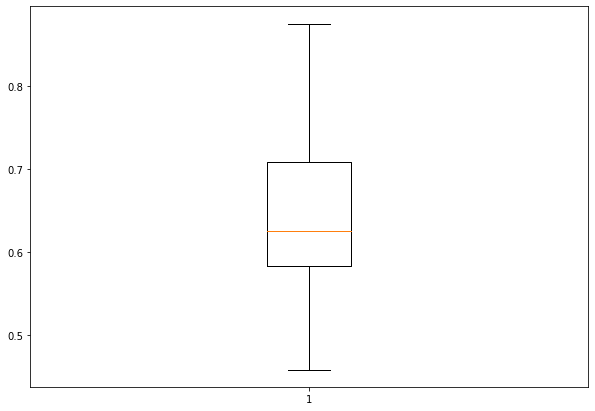

In [420]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values_rf=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(Feat,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values_rf.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values_rf)
 
plt.show()

In [421]:
# 10 cross validation

sca=StandardScaler()
lr=LogisticRegression()
ppl=Pipeline([('scaler',sca),('clf',lr)])

n_fold=10
cv=KFold(n_fold,shuffle=False)
score_1=cross_val_score(ppl,Feat,labels,cv=cv,n_jobs=-1)
print(score_1)

[0.         0.16666667 0.08333333 0.16666667 0.5        0.5
 0.41666667 0.41666667 0.27272727 0.36363636]


In [2]:
#  LEAD MATRIX
Lead_list=list()
labels=[]
for i in range(1,56):
    if not(i==17):
        time_series=load_data_mat(f"BP_Timeseries/sub{i}_EPI_BPaal_timeseries.mat")[5:175,:]
        L=lead_matrix_1(time_series)
        N=L.shape[0]
        feat=[]
        for j in range(N):
            for k in range(j,N):
                if (not j==k):
                    feat.append(L[j,k])
        Lead_list.append(feat)
        labels.append("BP")
        
for i in range(1,66):
    if not(i==33):
        time_series=load_data_mat(f"HC_Timeseries/sub{i}_EPI_HCaal_timeseries.mat")[5:175,:]
        L=lead_matrix_1(time_series)
        N=L.shape[0]
        feat=[]
        for j in range(N):
            for k in range(j,N):
                if (not j==k):
                    feat.append(L[j,k])
        Lead_list.append(feat)
        labels.append("HC")

LEAD=np.array(Lead_list)


In [6]:
X_train, X_test, y_train, y_test=train_test_split(LEAD,labels,test_size=0.2)
clf_rf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf_rf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.7083333333333334


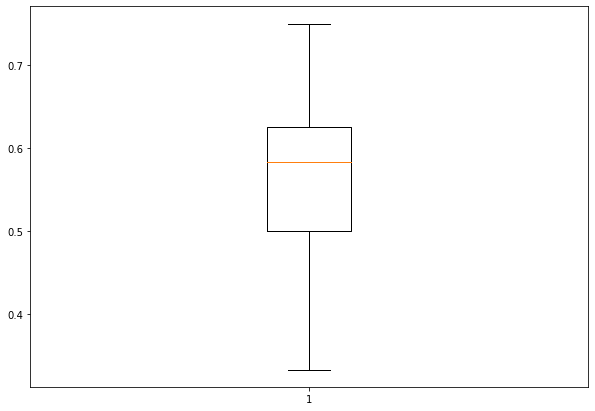

In [7]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(LEAD,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values)
 
plt.show()

In [425]:
# cross validation
sca=StandardScaler()
lr=LogisticRegression()
ppl=Pipeline([('scaler',sca),('clf',lr)])

n_fold=10
cv=KFold(n_fold,shuffle=False)
score_1=cross_val_score(ppl,LEAD,labels,cv=cv,n_jobs=-1)
print(score_1)

[0.         0.         0.         0.         0.5        0.
 0.         0.08333333 0.09090909 0.        ]


In [426]:
#  CLIQUE COMPLEX DIRECTED
topological_clique_list=list()
labels=[]
for i in range(1,56):
    if not(i==17):
        time_series=load_data_mat(f"BP_Timeseries/sub{i}_EPI_BPaal_timeseries.mat")[10:170,:]
        L=lead_matrix_1(time_series)
        dgm_clique=rev_directed(L)
        PE = PersistenceEntropy()
        pe_feat = PE.fit_transform(dgm_clique)
        A=Amplitude()
        ampl_feat=A.fit_transform(dgm_clique)
        feat1=pe_feat.flatten()
        feat2=ampl_feat.flatten()
        feat=np.concatenate((feat1,feat2), axis=0)
        topological_clique_list.append(feat)
        labels.append("BP")
        
for i in range(1,66):
    if not(i==33):
        time_series=load_data_mat(f"HC_Timeseries/sub{i}_EPI_HCaal_timeseries.mat")[10:170,:]
        L=lead_matrix_1(time_series)
        dgm_clique=rev_directed(L)
        PE = PersistenceEntropy()
        pe_feat = PE.fit_transform(dgm_clique)
        A=Amplitude()
        ampl_feat=A.fit_transform(dgm_clique)
        feat1=pe_feat.flatten()
        feat2=ampl_feat.flatten()
        feat=np.concatenate((feat1,feat2), axis=0)
        topological_clique_list.append(feat)
        labels.append("HC")

topological_clique_array=np.array(topological_clique_list)

In [427]:
X_train, X_test, y_train, y_test=train_test_split(topological_clique_array,labels,test_size=0.2)
clf_rf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf_rf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.6666666666666666


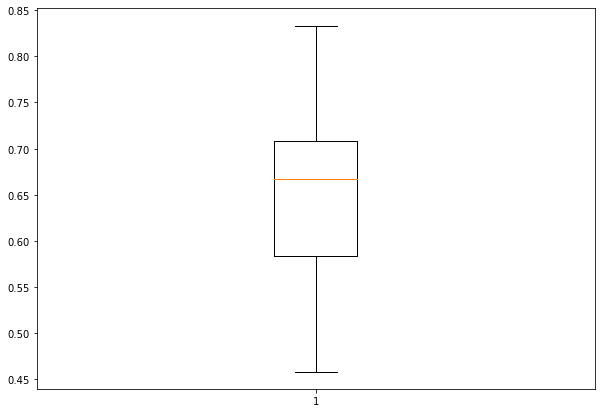

In [428]:
# PLOT RANDOM FOREST
acc_values=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(topological_clique_array,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values)
 
plt.show()

In [429]:
# cross validation
sca=StandardScaler()
lr=LogisticRegression()
ppl=Pipeline([('scaler',sca),('clf',lr)])

n_fold=10
cv=KFold(n_fold,shuffle=False)
score_1=cross_val_score(ppl,topological_clique_array,labels,cv=cv,n_jobs=-1)
print(score_1)

[0.         0.         0.         0.         0.41666667 0.33333333
 0.41666667 0.33333333 0.27272727 0.27272727]


In [474]:
#  CLIQUE COMPLEX UNDIRECTED
topological_clique_undirected_list=list()
labels=[]
for i in range(1,56):
    if not(i==17):
        time_series=load_data_mat(f"BP_Timeseries/sub{i}_EPI_BPaal_timeseries.mat")[10:170,:]
        L=lead_matrix_1(time_series)
        dgm_clique=rev_undirected(L)
        PE = PersistenceEntropy()
        pe_feat = PE.fit_transform(dgm_clique)
        #A=Amplitude()
        #ampl_feat=A.fit_transform(dgm_clique)
        feat1=pe_feat.flatten()
        #feat2=ampl_feat.flatten()
        #feat=np.concatenate((feat1,feat2), axis=0)
        topological_clique_undirected_list.append(feat1)
        labels.append("BP")
        
for i in range(1,66):
    if not(i==33):
        time_series=load_data_mat(f"HC_Timeseries/sub{i}_EPI_HCaal_timeseries.mat")[10:170,:]
        L=lead_matrix_1(time_series)
        dgm_clique=rev_undirected(L)
        PE = PersistenceEntropy()
        pe_feat = PE.fit_transform(dgm_clique)
        #A=Amplitude()
        #ampl_feat=A.fit_transform(dgm_clique)
        feat1=pe_feat.flatten()
        #feat2=ampl_feat.flatten()
        #feat=np.concatenate((feat1,feat2), axis=0)
        topological_clique_undirected_list.append(feat1)
        labels.append("HC")

topological_clique_undirected_array=np.array(topological_clique_undirected_list)

In [475]:
X_train, X_test, y_train, y_test=train_test_split(topological_clique_undirected_array,labels,test_size=0.2)
clf_rf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf_rf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.3333333333333333


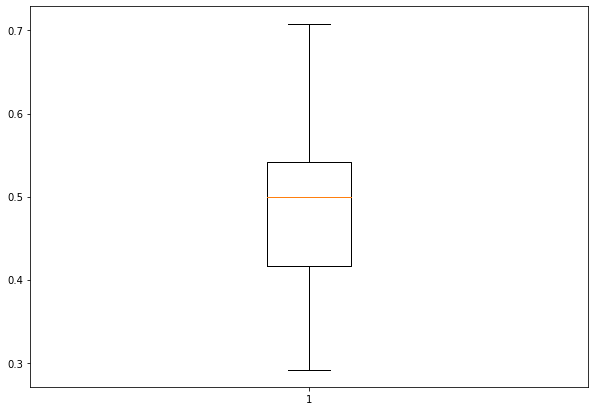

In [476]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(topological_clique_undirected_array,labels,test_size=0.2)
    clf_rf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf_rf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values)
 
plt.show()

In [484]:
# cross validation

sca=StandardScaler()
lr=LogisticRegression()
ppl=Pipeline([('scaler',sca),('clf',lr)])

n_fold=118
cv=KFold(n_fold,shuffle=True)
score_1=cross_val_score(ppl,topological_clique_undirected_array,labels,cv=cv,n_jobs=-1)
print(score_1)

print(np.mean(score_1[59:]))

[0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.]
0.559322033898305


In [485]:
topological_clique_undirected_array

array([[6.7696219 , 6.74186805],
       [6.81076515, 6.71946298],
       [6.80927744, 5.60740087],
       [6.7604426 , 6.63062179],
       [6.78640403, 6.05798924],
       [6.76710187, 6.61428006],
       [6.78655373, 7.28454758],
       [6.72756661, 7.6126754 ],
       [6.76864695, 6.7295551 ],
       [6.78189504, 7.4108504 ],
       [6.80564715, 6.13223836],
       [6.78496424, 6.96070878],
       [6.7875706 , 6.11408608],
       [6.78671244, 7.01104251],
       [6.80041011, 5.90040192],
       [6.78510997, 7.68398666],
       [6.80391052, 5.04672106],
       [6.79594127, 4.58411777],
       [6.7869604 , 4.81554654],
       [6.82293706, 6.94669935],
       [6.78352741, 5.05740931],
       [6.76883332, 5.28085881],
       [6.81671521, 6.53235846],
       [6.80731029, 6.11204916],
       [6.70200531, 7.44016737],
       [6.74419508, 6.37871901],
       [6.7910815 , 5.89254785],
       [6.81256929, 6.81601099],
       [6.72135638, 7.15040211],
       [6.8205335 , 6.79925799],
       [6.

In [486]:
#  COUNTING LOOPS
loops_list=list()
labels=[]
for i in range(1,56):
    if not(i==17):
        time_series=load_data_mat(f"BP_Timeseries/sub{i}_EPI_BPaal_timeseries.mat")
        L=lead_matrix_1(time_series)
        dgm1=rev_undirected(L)
        dgm2=rev_directed(L)
        dist=PairwiseDistance()
        dist2=dist.fit_transform(dgm1,dgm2)
        loops_list.append(dist2)
        labels.append("BP")
        
for i in range(1,66):
    if not(i==33):
        time_series=load_data_mat(f"HC_Timeseries/sub{i}_EPI_HCaal_timeseries.mat")
        L=lead_matrix_1(time_series)
        dgm1=rev_undirected(L)
        dgm2=rev_directed(L)
        dist=PairwiseDistance()
        dist2=dist.fit_transform(dgm1,dgm2)
        loops_list.append(dist2)
        labels.append("HC")

loops_array=np.array(loops_list).reshape(-1,1)

In [487]:
#  NON VEDO NULLA, ATTENZIONE CHE NON FUNZIONA

In [488]:
# HYPERCOHERENCE
indifference_value=0.05
Hyp_coh_list=list()
labels=[]
for i in range(1,56):
    if not(i==17):
        time_series=load_data_mat(f"BP_Timeseries/sub{i}_EPI_BPaal_timeseries.mat")
        L=lead_matrix_1(time_series)
        T=lead_tensor_1(time_series)
        f=create_filtration(L,T,indifference_value)
        hyp=f[2]
        Hyp_coh_list.append(hyp)
        labels.append("BP")
        
for i in range(1,66):
    if not(i==33):
        time_series=load_data_mat(f"HC_Timeseries/sub{i}_EPI_HCaal_timeseries.mat")
        L=lead_matrix_1(time_series)
        T=lead_tensor_1(time_series)
        f=create_filtration(L,T,indifference_value)
        hyp=f[2]
        Hyp_coh_list.append(hyp)
        labels.append("HC")


In [489]:
Hyp_coh_array=np.array(Hyp_coh_list)

In [490]:
HYP=Hyp_coh_array.reshape(-1,1)

In [491]:
Hyp_coh_list

[0.5867079618085694,
 0.4290026039611773,
 0.5117809516294485,
 0.5492582656040401,
 0.2811725716089324,
 0.45812356979405033,
 0.41013572161287776,
 0.38410005523554014,
 0.30489623609248007,
 0.31338672768878717,
 0.45580367710881403,
 0.4525092716799495,
 0.49020358241931666,
 0.5473092401167837,
 0.3732383808095952,
 0.47888029669375837,
 0.35179910044977514,
 0.4611299613351219,
 0.22355006707172728,
 0.7997751124437781,
 0.46571056576974673,
 0.45491596307109605,
 0.586865777637497,
 0.39715931507930247,
 0.4895131381677582,
 0.5357650122307267,
 0.4075672689970804,
 0.5249349009705674,
 0.296322891185986,
 0.4360530261185197,
 0.5357452852521107,
 0.6516689023909098,
 0.3829598358715379,
 0.5751203345695574,
 0.7495541702832794,
 0.4178095162944843,
 0.3080012625266314,
 0.7959086246350509,
 0.3168547305294721,
 0.603302296220311,
 0.3692456403377259,
 0.4247297403929614,
 0.4848536258186696,
 0.21744259449222758,
 0.5121912727846603,
 0.48013098713800995,
 0.35265525132170755,


In [492]:
X_train, X_test, y_train, y_test=train_test_split(HYP,labels,test_size=0.2)
clf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.5416666666666666


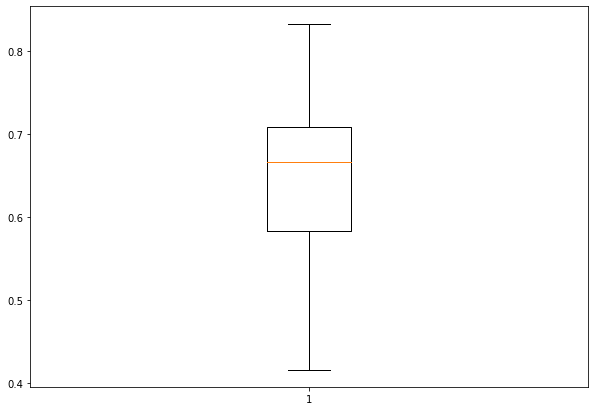

In [493]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(HYP,labels,test_size=0.2)
    clf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values.append(acc)

    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values)
 
plt.show()

In [494]:
# cross validation
sca=StandardScaler()
lr=LogisticRegression()
ppl=Pipeline([('scaler',sca),('clf',lr)])

n_fold=118
cv=KFold(n_fold,shuffle=False)
score_1=cross_val_score(ppl,HYP,labels,cv=cv,n_jobs=-1)
print(score_1)

[1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1.]


In [ ]:
# SIMPLICIAL COMPLEX HIGH ( still figuring out how to get entropy with gudhi)



#High_lead=list()
#labels=[]
#for i in range(1,56):
    #if not(i==17):
        #time_series=load_data_mat(f"BP_Timeseries/sub{i}_EPI_BPaal_timeseries.mat")
        #dgm=create_diagram_directly(time_series,0)
        
        #labels.append("BP")
        
#for i in range(1,66):
    #if not(i==33):
        #time_series=load_data_mat(f"HC_Timeseries/sub{i}_EPI_HCaal_timeseries.mat")
        
        #labels.append("HC")


In [ ]:
# trying to compute stuff


#time_series=load_data_mat("BP_Timeseries/sub10_EPI_BPaal_timeseries.mat")
#dgm=create_diagram_directly(time_series,0)

In [ ]:
# still figuring out how to do


#en=Entropy()
#fen=en.__call__(dgm)
#entr=en.transform(fen)

In [ ]:
#entropy=Entropy.transform([dgm],y=None)

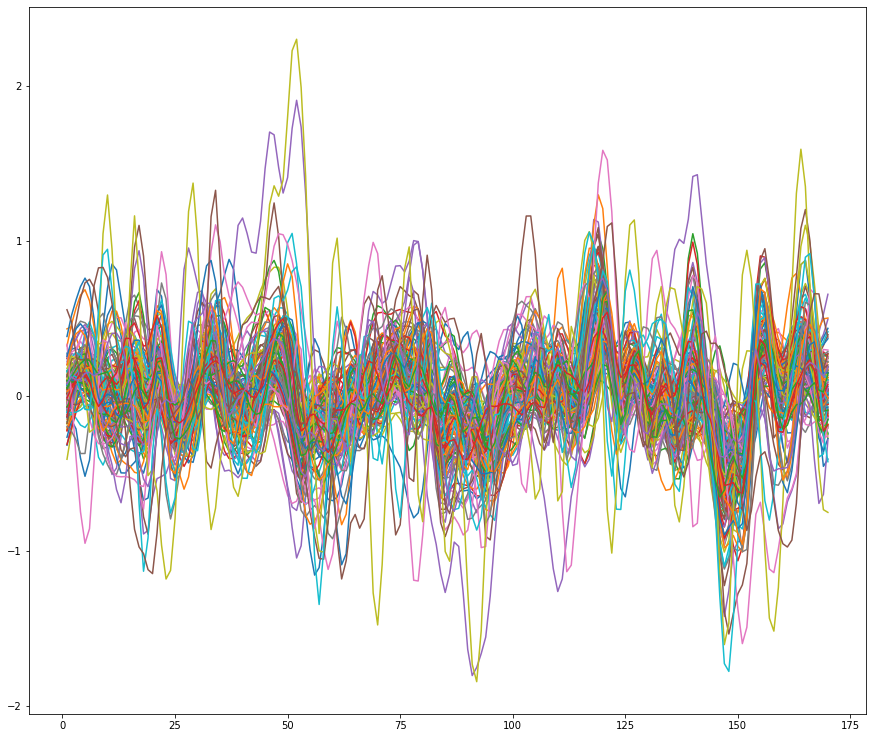

In [495]:
time_series=load_data_mat(f"BP_Timeseries/sub55_EPI_BPaal_timeseries.mat")[5:175,:]

plt.figure(figsize=(15,13))
for i in range(116):
    plt.plot(range(1,171),time_series[:,i])
    
plt.show()

In [496]:
L=lead_matrix_1(time_series)
dgm=rev_directed_mod(L)
plot_diagram(dgm[0])

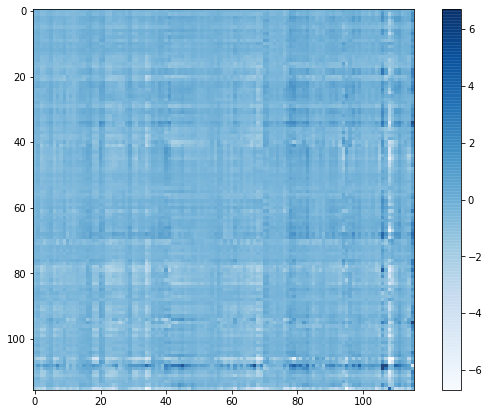

In [497]:
L=lead_matrix_1(time_series)
plt.figure(figsize=(10,7))
plt.imshow(L, alpha=0.9, cmap="Blues")
plt.colorbar()

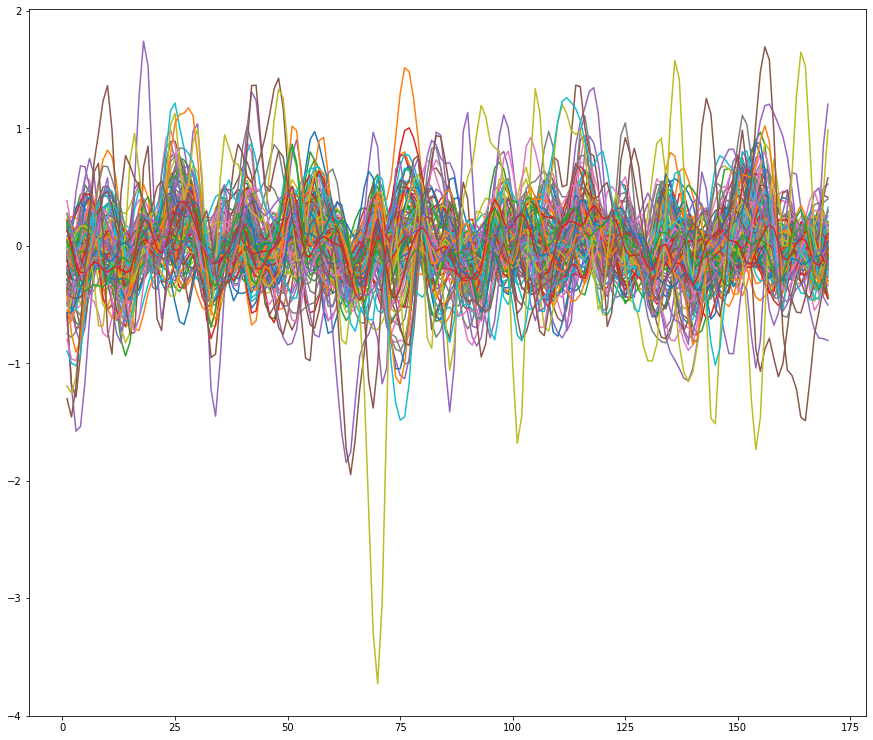

In [498]:
time_series=load_data_mat(f"HC_Timeseries/sub65_EPI_HCaal_timeseries.mat")[5:175,:]

plt.figure(figsize=(15,13))
for i in range(116):
    plt.plot(range(1,171),time_series[:,i])
    
plt.show()

In [499]:
L=lead_matrix_1(time_series)
dgm=rev_directed_mod(L)
plot_diagram(dgm[0])

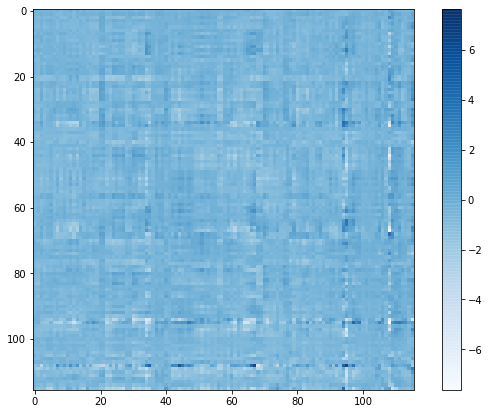

In [500]:
L=lead_matrix_1(time_series)
plt.figure(figsize=(10,7))
plt.imshow(L, alpha=0.9, cmap="Blues")
plt.colorbar()

In [501]:
#  LEAD MATRIX MODIFIED
Lead_list=list()
labels=[]
for i in range(1,56):
    if not(i==17):
        time_series=load_data_mat(f"BP_Timeseries/sub{i}_EPI_BPaal_timeseries.mat")
        L=lead_matrix_1(time_series)[20:40,55:75]
        N=L.shape[0]
        feat=[]
        for j in range(N):
            for k in range(j,N):
                if (not j==k):
                    feat.append(L[j,k])
        Lead_list.append(feat)
        labels.append("BP")
        
for i in range(1,66):
    if not(i==33):
        time_series=load_data_mat(f"HC_Timeseries/sub{i}_EPI_HCaal_timeseries.mat")
        L=lead_matrix_1(time_series)[20:40,55:75]
        N=L.shape[0]
        feat=[]
        for j in range(N):
            for k in range(j,N):
                if (not j==k):
                    feat.append(L[j,k])
        Lead_list.append(feat)
        labels.append("HC")

LEAD=np.array(Lead_list)


In [502]:
X_train, X_test, y_train, y_test=train_test_split(LEAD,labels,test_size=0.2)
clf_rf=RandomForestClassifier().fit(X_train,y_train)
y_predicted=clf_rf.predict(X_test)
acc=accuracy_score(y_test,y_predicted)
print(acc)

0.6666666666666666


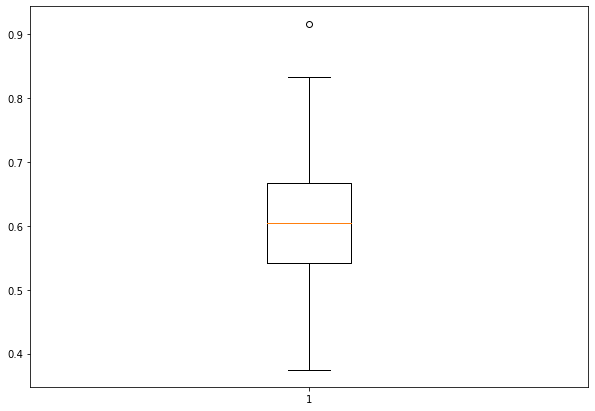

In [503]:
#PLOT OF RANDOM FOREST ACCURACY
acc_values=[]
for i in range(200):
    X_train, X_test, y_train, y_test=train_test_split(LEAD,labels,test_size=0.2)
    clf=RandomForestClassifier().fit(X_train,y_train)
    y_predicted=clf.predict(X_test)
    acc=accuracy_score(y_test,y_predicted)
    acc_values.append(acc)
    
    
    
fig = plt.figure(figsize =(10, 7))
 
plt.boxplot(acc_values)
 
plt.show()

In [ ]:
LEAD.shape

In [ ]:
LEAD

In [ ]:
LEAD[0]